<a href="https://colab.research.google.com/github/BooEiEi/Master-Project/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os# os ใช้จัดการกับไฟล์ ว่าอยู่ที่ไหน
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path_DF = '/content/drive/My Drive/master project/data/DF'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df_META = pd.read_csv(os.path.join(path_DF, 'df_META.csv'))
df_AAPL= pd.read_csv(os.path.join(path_DF, 'df_AAPL.csv'))
df_MSFT= pd.read_csv(os.path.join(path_DF, 'df_MSFT.csv'))
df_NVDA= pd.read_csv(os.path.join(path_DF, 'df_NVDA.csv'))
df_GOOG= pd.read_csv(os.path.join(path_DF, 'df_GOOG.csv'))

In [11]:
df_META=df_META.drop(['Unnamed: 0'], axis=1)
df_META['date'] = pd.to_datetime(df_META['date'])
# สร้าง Lag Features หลายช่วงเวลา
for lag in [1, 3, 5, 7]:
    df_META[f'lag_{lag}'] = df_META['Stockprice_META'].shift(lag)

# ลบค่าที่เป็น NaN จากการสร้าง lag features
df_META.dropna(inplace=True)

In [12]:
df_AAPL=df_AAPL.drop(['Unnamed: 0'], axis=1)
df_AAPL['date'] = pd.to_datetime(df_AAPL['date'])
for lag in [1, 3, 5, 7]:
    df_AAPL[f'lag_{lag}'] = df_AAPL['Stockprice_AAPL'].shift(lag)

# ลบค่าที่เป็น NaN จากการสร้าง lag features
df_AAPL.dropna(inplace=True)

In [13]:
df_MSFT=df_MSFT.drop(['Unnamed: 0'], axis=1)
df_MSFT['date'] = pd.to_datetime(df_MSFT['date'])
for lag in [1, 3, 5, 7]:
    df_MSFT[f'lag_{lag}'] = df_MSFT['Stockprice_MSFT'].shift(lag)

# ลบค่าที่เป็น NaN จากการสร้าง lag features
df_MSFT.dropna(inplace=True)

In [14]:
df_NVDA=df_NVDA.drop(['Unnamed: 0'], axis=1)
df_NVDA['date'] = pd.to_datetime(df_NVDA['date'])
for lag in [1, 3, 5, 7]:
    df_NVDA[f'lag_{lag}'] = df_NVDA['Stockprice_NVDA'].shift(lag)

# ลบค่าที่เป็น NaN จากการสร้าง lag features
df_NVDA.dropna(inplace=True)

In [15]:
df_GOOG=df_GOOG.drop(['Unnamed: 0'], axis=1)
df_GOOG['date'] = pd.to_datetime(df_GOOG['date'])
for lag in [1, 3, 5, 7]:
    df_GOOG[f'lag_{lag}'] = df_GOOG['Stockprice_GOOGL'].shift(lag)

# ลบค่าที่เป็น NaN จากการสร้าง lag features
df_GOOG.dropna(inplace=True)

In [16]:
df_GOOG

,date,Stockprice_GOOGL,sentiment_GOOGL,Interest,UNEMPLOYMENT,CPI,US_Treasury_Yield,RETAIL_SALES,US_inflation_rate,Real_GDP,US_Dollar_Index,S&P500,NASDAQ,WTI,BTC,Gold,lag_1,lag_3,lag_5,lag_7
7,2025-02-19,185.27,0.38565,4.33,4.0,317.671,4.53,577230.0,0.030,6001.465,107.17,6144.15,20056.25,72.08,96644.8,2936.1,184.56,179.25,172.73,170.28
8,2025-02-18,183.77,0.31820,4.33,4.0,317.671,4.55,577230.0,0.030,6001.465,107.05,6129.58,20041.26,71.71,95638.0,2949.0,185.27,179.66,175.42,168.50
9,2025-02-14,185.23,0.12232,4.33,4.0,317.671,4.47,577230.0,0.030,6001.465,106.71,6114.63,20026.77,70.54,97504.6,2900.7,183.77,184.56,179.25,172.73
10,2025-02-13,186.14,-0.12474,4.33,4.0,317.671,4.52,577230.0,0.030,6001.465,107.31,6115.07,19945.64,71.30,96610.2,2945.4,185.23,185.27,179.66,175.42
11,2025-02-12,183.61,0.23920,4.33,4.0,317.671,4.62,577230.0,0.030,6001.465,107.94,6051.97,19649.95,71.12,97881.3,2928.7,186.14,183.77,184.56,179.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2022-03-07,2527.57,0.39640,0.08,3.7,287.504,1.78,595064.0,0.075,5337.277,99.29,4201.09,12830.96,122.09,38024.8,1995.9,2542.09,2648.59,2519.02,2665.61
749,2022-03-04,2638.13,-0.12800,0.08,3.7,287.504,1.74,595064.0,0.075,5337.277,98.65,4328.87,13313.44,116.37,39142.7,1966.6,2527.57,2668.40,2597.41,2583.96
750,2022-03-03,2677.99,0.00000,0.08,3.7,287.504,1.86,595064.0,0.075,5337.277,97.79,4363.49,13537.94,110.52,42463.0,1935.9,2638.13,2542.09,2648.59,2519.02
751,2022-03-02,2691.43,0.17790,0.08,3.7,287.504,1.86,595064.0,0.075,5337.277,97.39,4386.54,13752.02,112.22,43912.8,1922.3,2677.99,2527.57,2668.40,2597.41


#Feature Importance

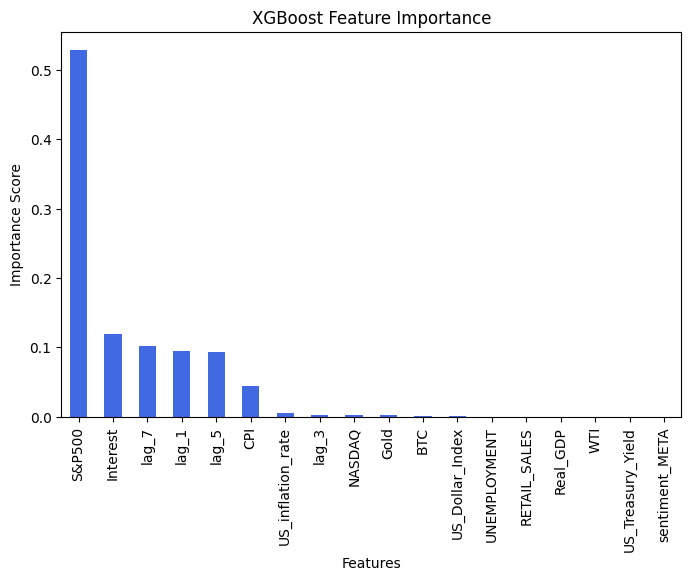

S&P500               0.528534
Interest             0.119263
lag_7                0.101834
lag_1                0.095611
lag_5                0.093666
CPI                  0.044834
US_inflation_rate    0.004911
lag_3                0.003155
NASDAQ               0.002728
Gold                 0.002196
BTC                  0.001415
US_Dollar_Index      0.000936
UNEMPLOYMENT         0.000242
RETAIL_SALES         0.000185
Real_GDP             0.000172
WTI                  0.000161
US_Treasury_Yield    0.000101
sentiment_META       0.000058
dtype: float32


In [17]:
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

X_META = df_META.drop(columns=["Stockprice_META","date"])
y_META = df_META["Stockprice_META"]
# สร้างโมเดล XGBoost
model = XGBRegressor(learning_rate=0.1, max_depth=5, subsample=0.9, reg_alpha=0.1, reg_lambda=0.1, random_state=42, objective='reg:squarederror')
model.fit(X_META, y_META)

# คำนวณ Feature Importance จาก XGBoost
feature_importance_xgb = pd.Series(model.feature_importances_, index=X_META.columns).sort_values(ascending=False)

# แสดง Feature Importance
plt.figure(figsize=(8, 5))
feature_importance_xgb.plot(kind="bar", color="royalblue")
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

# แสดงค่าความสำคัญของฟีเจอร์
print(feature_importance_xgb)


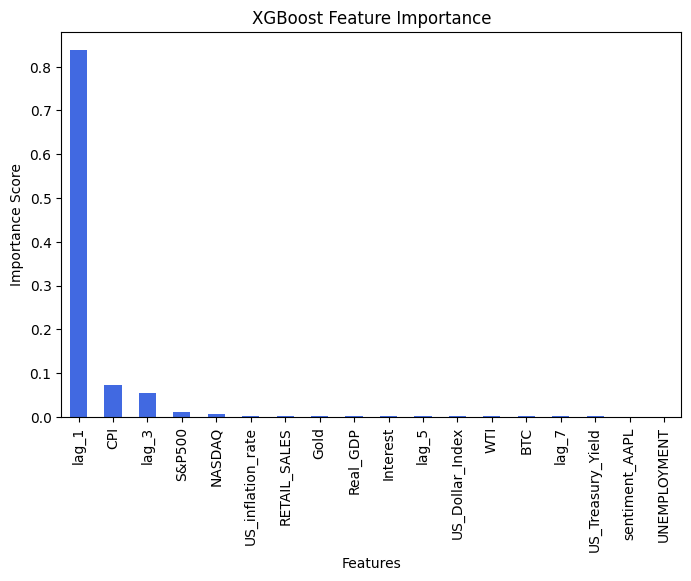

lag_1                0.837498
CPI                  0.073445
lag_3                0.053421
S&P500               0.010006
NASDAQ               0.006773
US_inflation_rate    0.002710
RETAIL_SALES         0.002375
Gold                 0.002209
Real_GDP             0.001602
Interest             0.001442
lag_5                0.001426
US_Dollar_Index      0.001370
WTI                  0.001321
BTC                  0.001309
lag_7                0.001224
US_Treasury_Yield    0.001061
sentiment_AAPL       0.000465
UNEMPLOYMENT         0.000343
dtype: float32


In [23]:
X_AAPL = df_AAPL.drop(columns=["Stockprice_AAPL","date"])
y_AAPL = df_AAPL["Stockprice_AAPL"]
# สร้างโมเดล XGBoost
model = XGBRegressor(learning_rate=0.1, max_depth=5, subsample=0.9, reg_alpha=0.1, reg_lambda=0.1, random_state=42, objective='reg:squarederror')
model.fit(X_AAPL, y_AAPL)

# คำนวณ Feature Importance จาก XGBoost
feature_importance_xgb = pd.Series(model.feature_importances_, index=X_AAPL.columns).sort_values(ascending=False)

# แสดง Feature Importance
plt.figure(figsize=(8, 5))
feature_importance_xgb.plot(kind="bar", color="royalblue")
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

# แสดงค่าความสำคัญของฟีเจอร์
print(feature_importance_xgb)


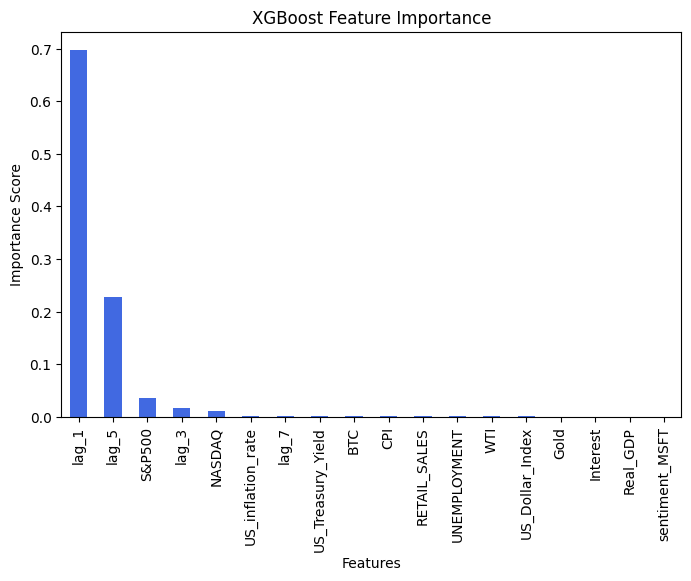

lag_1                0.696858
lag_5                0.227333
S&P500               0.036061
lag_3                0.016973
NASDAQ               0.010257
US_inflation_rate    0.001612
lag_7                0.001386
US_Treasury_Yield    0.001360
BTC                  0.001339
CPI                  0.001144
RETAIL_SALES         0.001091
UNEMPLOYMENT         0.000963
WTI                  0.000920
US_Dollar_Index      0.000666
Gold                 0.000639
Interest             0.000622
Real_GDP             0.000532
sentiment_MSFT       0.000244
dtype: float32


In [24]:
X_MSFT = df_MSFT.drop(columns=["Stockprice_MSFT","date"])
y_MSFT = df_MSFT["Stockprice_MSFT"]
# สร้างโมเดล XGBoost
model = XGBRegressor(learning_rate=0.1, max_depth=5, subsample=0.9, reg_alpha=0.1, reg_lambda=0.1, random_state=42, objective='reg:squarederror')
model.fit(X_MSFT, y_MSFT)

# คำนวณ Feature Importance จาก XGBoost
feature_importance_xgb = pd.Series(model.feature_importances_, index=X_MSFT.columns).sort_values(ascending=False)

# แสดง Feature Importance
plt.figure(figsize=(8, 5))
feature_importance_xgb.plot(kind="bar", color="royalblue")
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

# แสดงค่าความสำคัญของฟีเจอร์
print(feature_importance_xgb)


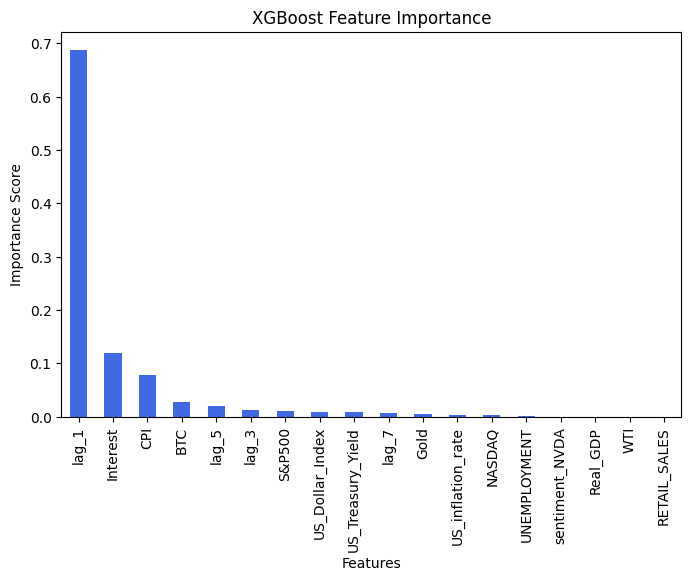

lag_1                0.687135
Interest             0.120316
CPI                  0.078746
BTC                  0.027154
lag_5                0.020904
lag_3                0.012856
S&P500               0.011024
US_Dollar_Index      0.009706
US_Treasury_Yield    0.009393
lag_7                0.006301
Gold                 0.005625
US_inflation_rate    0.004120
NASDAQ               0.003492
UNEMPLOYMENT         0.002067
sentiment_NVDA       0.000441
Real_GDP             0.000436
WTI                  0.000186
RETAIL_SALES         0.000098
dtype: float32


In [25]:
X_NVDA = df_NVDA.drop(columns=["Stockprice_NVDA","date"])
y_NVDA = df_NVDA["Stockprice_NVDA"]
# สร้างโมเดล XGBoost
model = XGBRegressor(learning_rate=0.1, max_depth=5, subsample=0.9, reg_alpha=0.1, reg_lambda=0.1, random_state=42, objective='reg:squarederror')
model.fit(X_NVDA, y_NVDA)

# คำนวณ Feature Importance จาก XGBoost
feature_importance_xgb = pd.Series(model.feature_importances_, index=X_NVDA.columns).sort_values(ascending=False)

# แสดง Feature Importance
plt.figure(figsize=(8, 5))
feature_importance_xgb.plot(kind="bar", color="royalblue")
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

# แสดงค่าความสำคัญของฟีเจอร์
print(feature_importance_xgb)


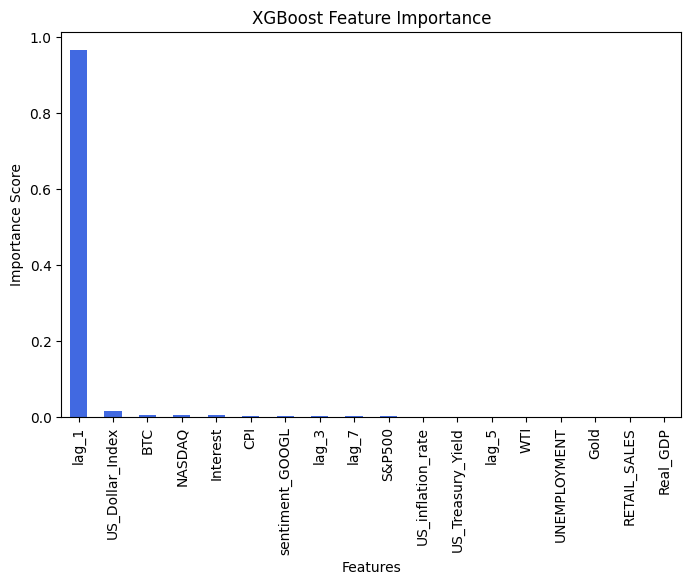

lag_1                0.965683
US_Dollar_Index      0.015739
BTC                  0.005404
NASDAQ               0.004286
Interest             0.003356
CPI                  0.001466
sentiment_GOOGL      0.001075
lag_3                0.000950
lag_7                0.000872
S&P500               0.000609
US_inflation_rate    0.000242
US_Treasury_Yield    0.000168
lag_5                0.000085
WTI                  0.000022
UNEMPLOYMENT         0.000014
Gold                 0.000014
RETAIL_SALES         0.000010
Real_GDP             0.000004
dtype: float32


In [26]:
X_GOOG = df_GOOG.drop(columns=["Stockprice_GOOGL","date"])
y_GOOG = df_GOOG["Stockprice_GOOGL"]
# สร้างโมเดล XGBoost
model = XGBRegressor(learning_rate=0.1, max_depth=5, subsample=0.9, reg_alpha=0.1, reg_lambda=0.1, random_state=42, objective='reg:squarederror')
model.fit(X_GOOG, y_GOOG)

# คำนวณ Feature Importance จาก XGBoost
feature_importance_xgb = pd.Series(model.feature_importances_, index=X_GOOG.columns).sort_values(ascending=False)

# แสดง Feature Importance
plt.figure(figsize=(8, 5))
feature_importance_xgb.plot(kind="bar", color="royalblue")
plt.title("XGBoost Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

# แสดงค่าความสำคัญของฟีเจอร์
print(feature_importance_xgb)


#Correlation

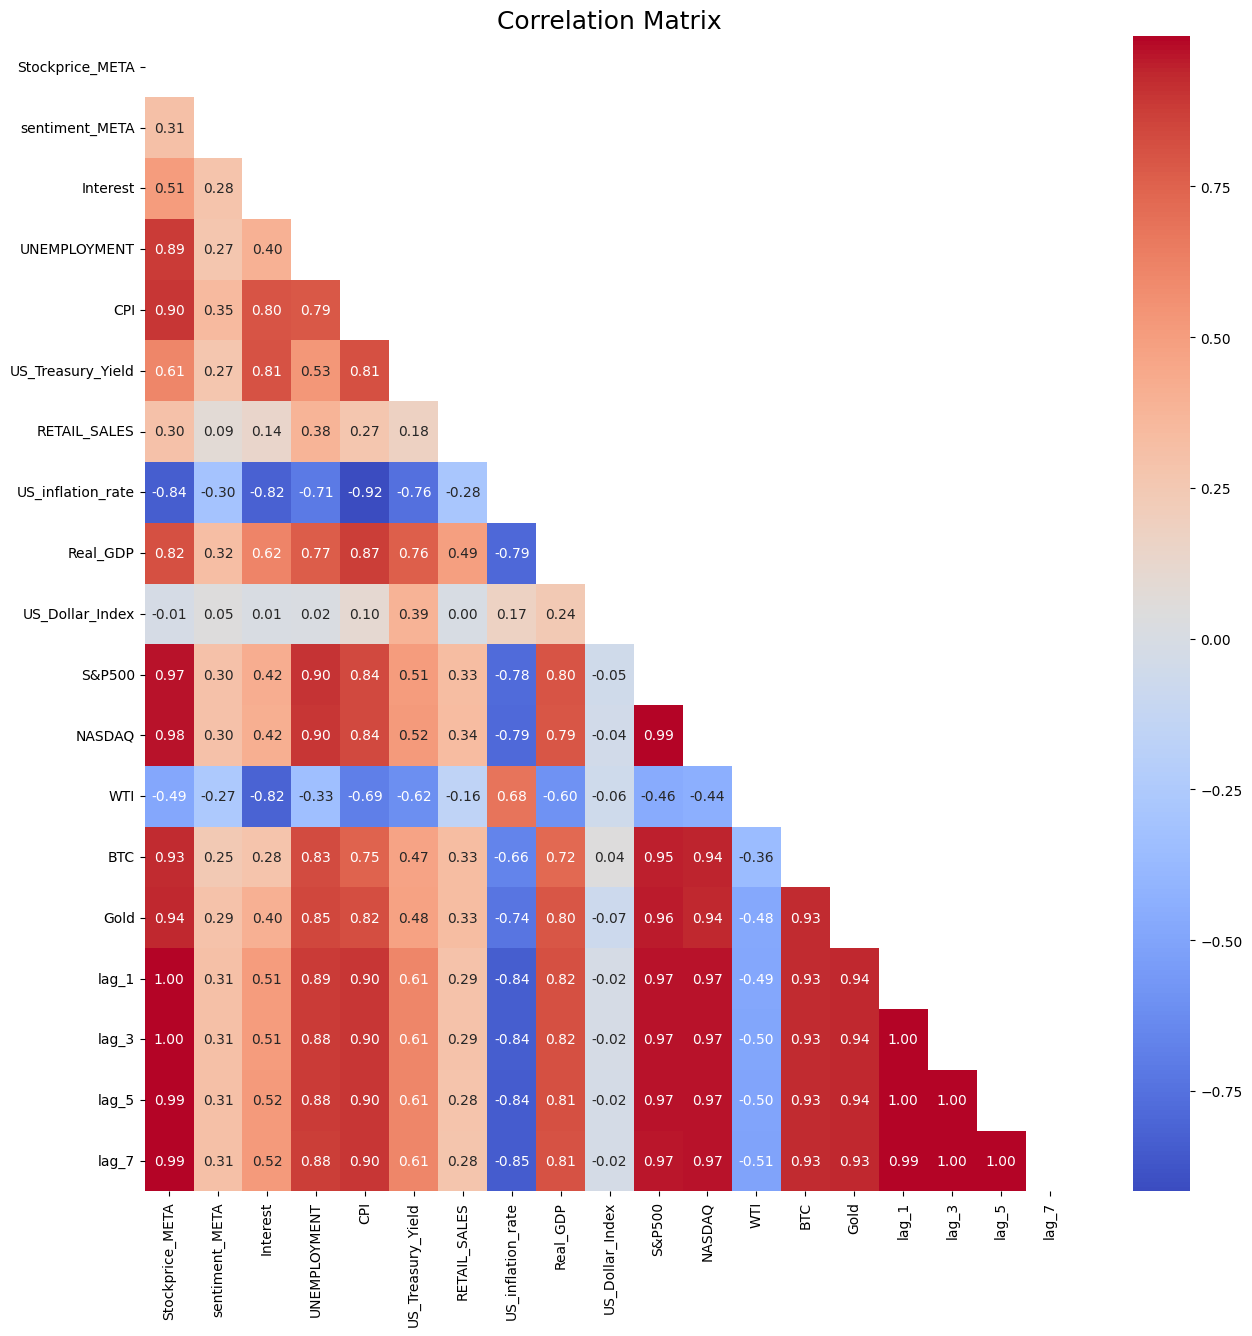

In [35]:
mask_META = np.triu(np.ones_like(df_META.drop(columns=["date"]).corr(), dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(df_META.drop(columns=["date"]).corr(), annot=True, mask=mask_META, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix", fontsize=18)
# แสดงผล
plt.show()

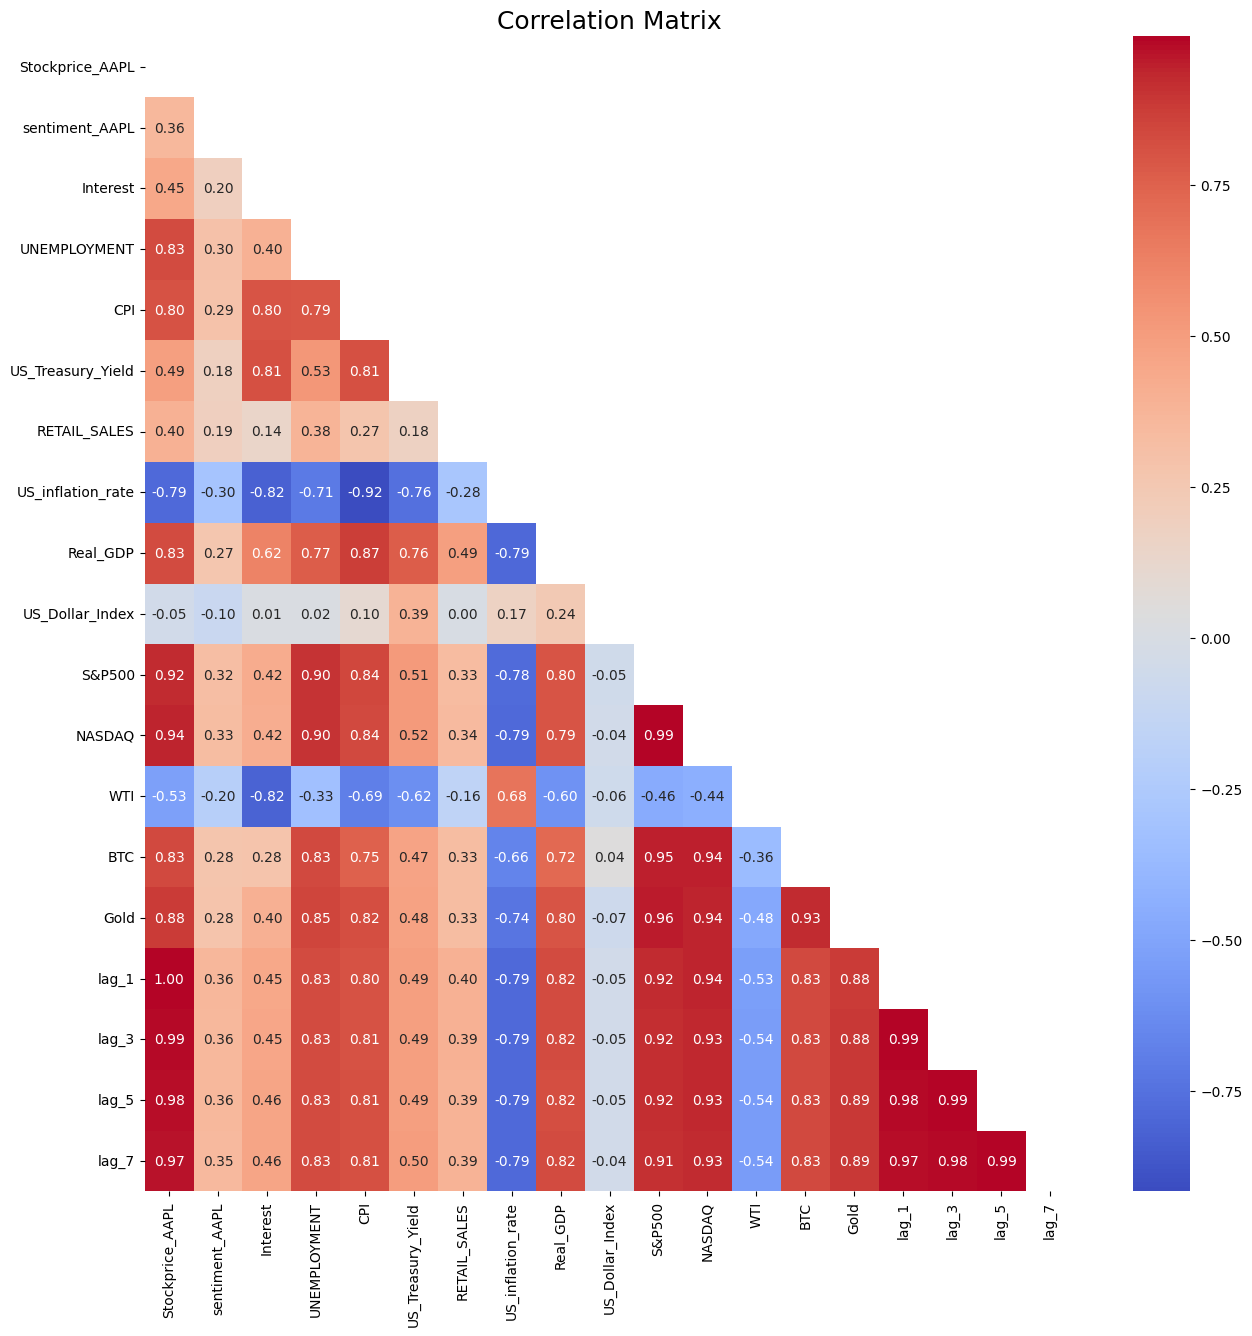

In [36]:
mask_AAPL = np.triu(np.ones_like(df_AAPL.drop(columns=["date"]).corr(), dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(df_AAPL.drop(columns=["date"]).corr(), annot=True, mask=mask_AAPL, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix", fontsize=18)
# แสดงผล
plt.show()

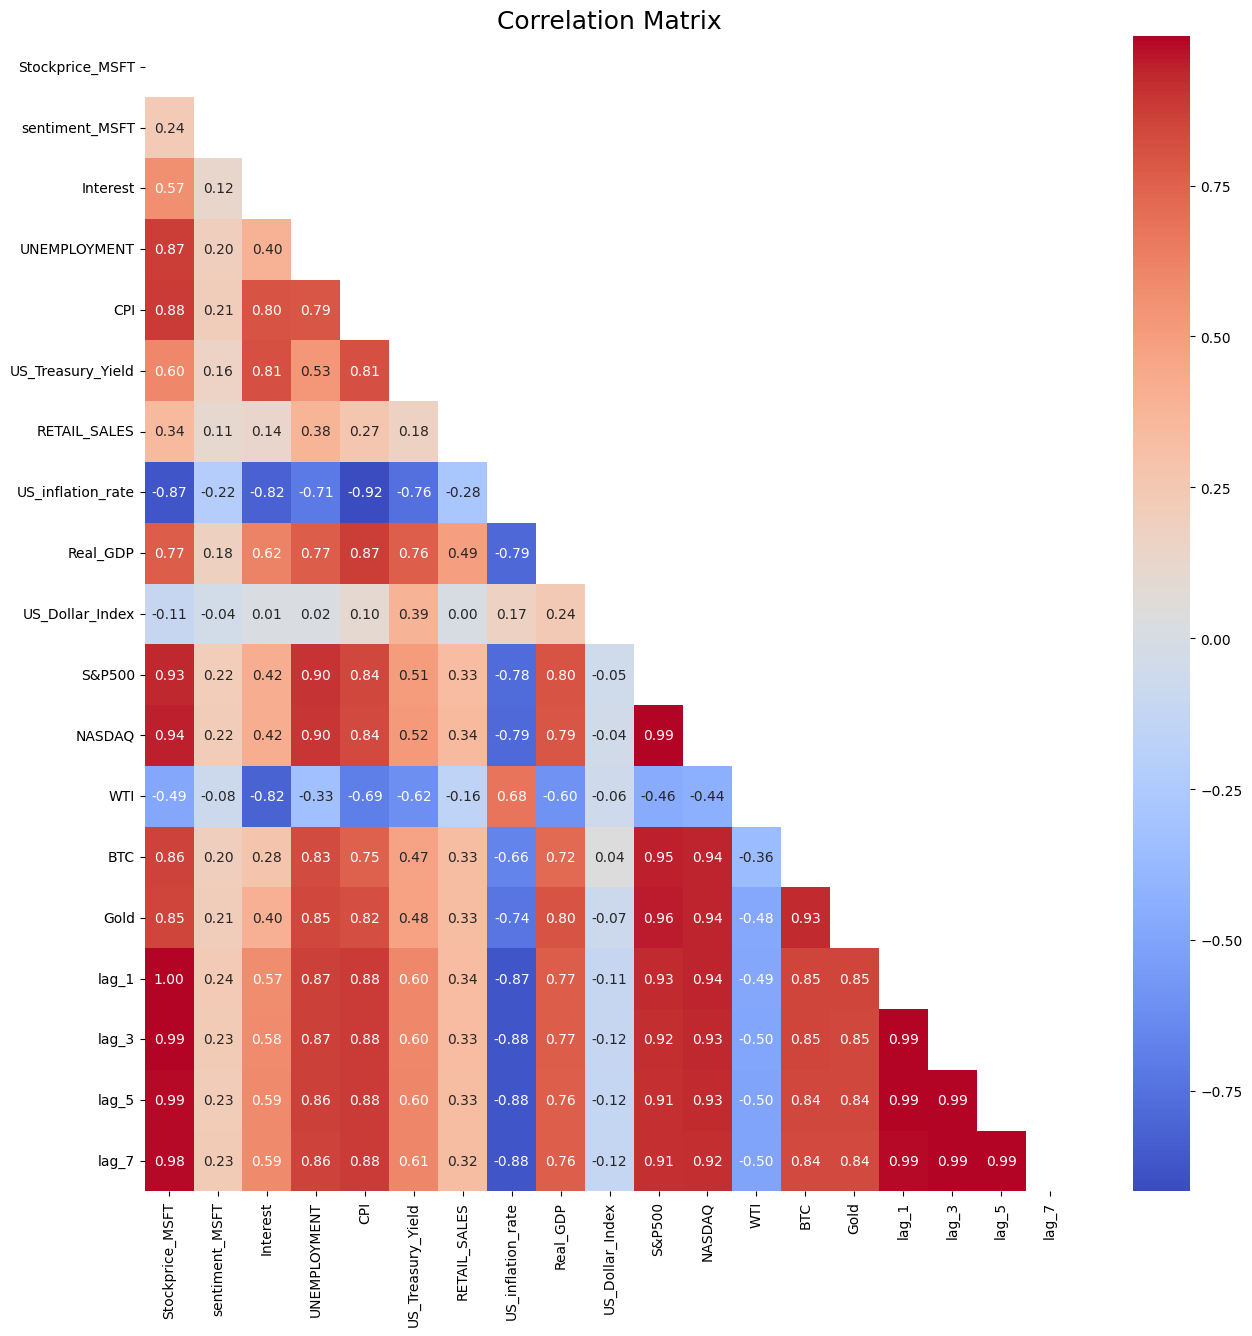

In [37]:
mask_MSFT = np.triu(np.ones_like(df_MSFT.drop(columns=["date"]).corr(), dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(df_MSFT.drop(columns=["date"]).corr(), annot=True, mask=mask_MSFT, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix", fontsize=18)
# แสดงผล
plt.show()

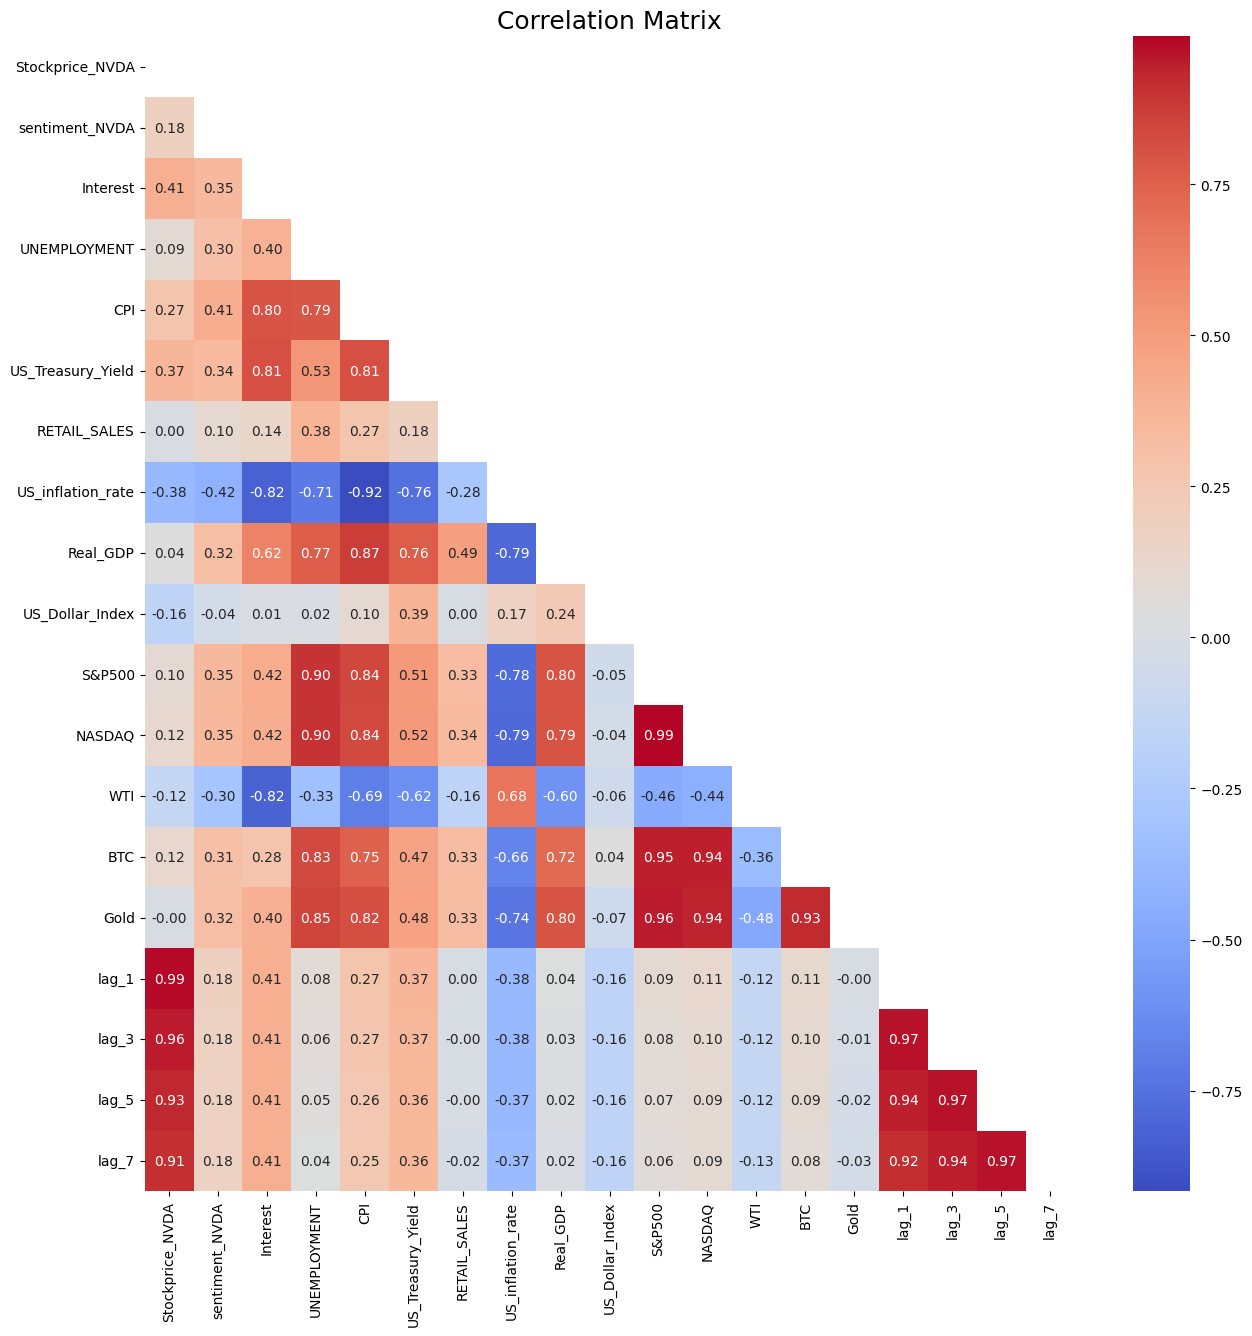

In [38]:
mask_NVDA = np.triu(np.ones_like(df_NVDA.drop(columns=["date"]).corr(), dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(df_NVDA.drop(columns=["date"]).corr(), annot=True, mask=mask_NVDA, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix", fontsize=18)
# แสดงผล
plt.show()

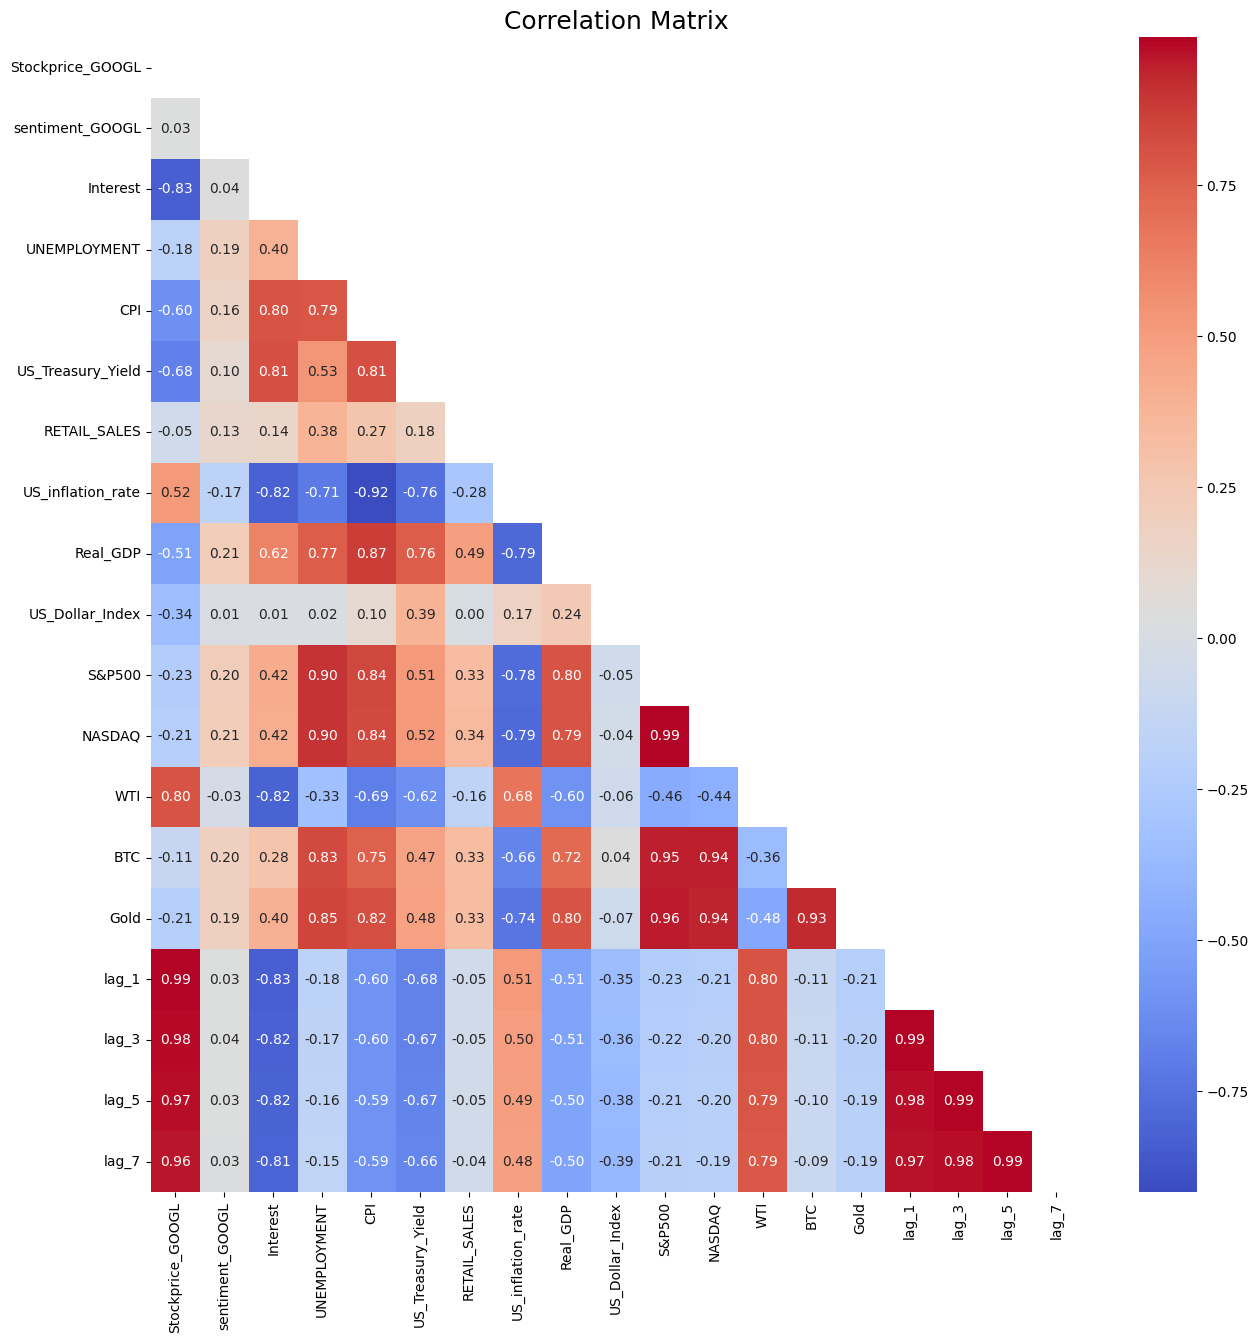

In [39]:
mask_GOOG = np.triu(np.ones_like(df_GOOG.drop(columns=["date"]).corr(), dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(df_GOOG.drop(columns=["date"]).corr(), annot=True, mask=mask_GOOG, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix", fontsize=18)
# แสดงผล
plt.show()